Let's import the packages we need in Python environment.

In [8]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999

**Step 1:** Read and identify shape of the dataFrame.

In [17]:
train_df = pd.read_csv("train_2016.csv", parse_dates=["transactiondate"])
train_df.shape
print("The shape of the dataFrame is %s." %str(train_df.shape))

The shape of the dataFrame is (90811, 3).


Let's check the dataFrame visually.

In [21]:
train_df.head()

,parcelid,logerror,transactiondate
0,11016594,0.0276,2016-01-01
1,14366692,-0.1684,2016-01-01
2,12098116,-0.0040,2016-01-01
3,12643413,0.0218,2016-01-02
4,14432541,-0.0050,2016-01-02


**Step 2.** Let's analyze the outcome variable (Log Error).

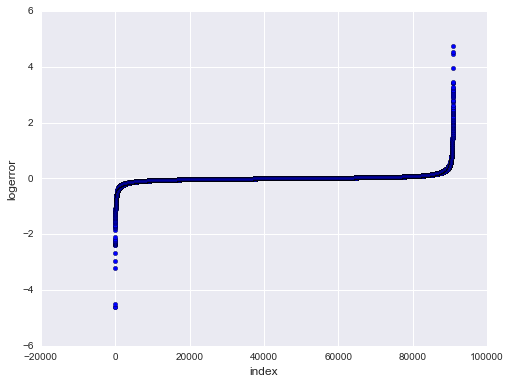

In [22]:
plt.figure(figsize=(8,6))
plt.scatter(range(train_df.shape[0]), np.sort(train_df.logerror.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('logerror', fontsize=12)
plt.show()

Let's find out the upper and lower limits of logerror as 99th and 1st percentile.

In [29]:
ulimit = np.percentile(train_df.logerror.values, 99)
ulimit

0.4661399999999965

In [32]:
llimit = np.percentile(train_df.logerror.values, 1)
llimit

-0.35670000000000002

Filter the data and replace with upper and lower limits of logerror

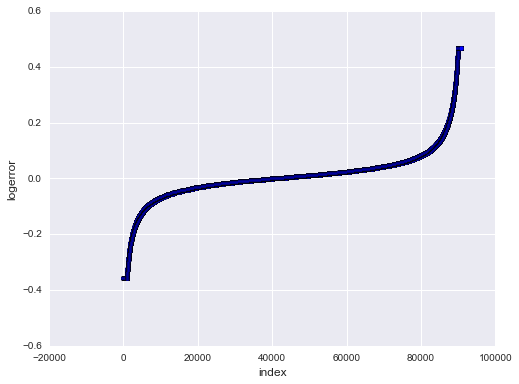

In [37]:
train_df['logerror'].ix[train_df['logerror']>ulimit] = ulimit
train_df['logerror'].ix[train_df['logerror']<llimit] = llimit

#Plot figure
plt.figure(figsize = (8, 6))
plt.scatter(range(train_df.shape[0]), np.sort(train_df['logerror']))
plt.xlabel('index', fontsize = 12)
plt.ylabel('logerror', fontsize = 12)

Let's check the histogram

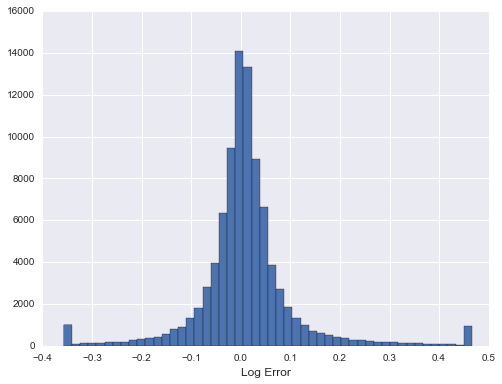

In [43]:
plt.figure(figsize = (8,6))
plt.hist(train_df['logerror'], bins = 50)
plt.xlabel('Log Error', fontsize = 12)
plt.show()

Seems like a normal distribution. (Ideal case for regression.)

**Step 3:** Let's analyze predictor varaiables.

Transaction Dates: How many transactions happen per month?

In [62]:
train_df['transaction_month'] = train_df['transactiondate'].dt.month

In [63]:
count_by_month = train_df['transaction_month'].value_counts()

In [68]:
print(count_by_month.values)
print(count_by_month.index)

[10968 10510 10056  9984  9597  9407  8752  6574  6401  4991  1829  1742]
Int64Index([6, 8, 5, 7, 9, 4, 3, 1, 2, 10, 11, 12], dtype='int64')


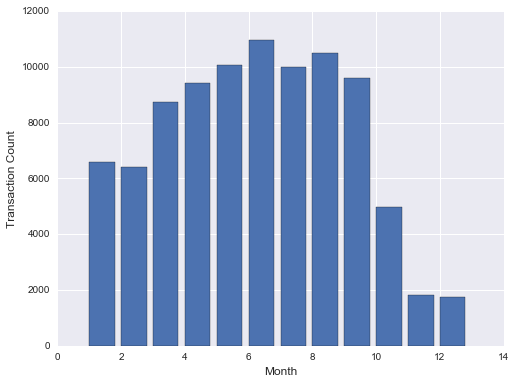

In [71]:
plt.figure(figsize=(8,6))
plt.bar(count_by_month.index, count_by_month.values)
plt.xlabel('Month', fontsize = 12)
plt.ylabel('Transaction Count', fontsize = 12)
plt.show()

**Parcel ID**

In [74]:
(train_df['parcelid'].value_counts().reset_index())['parcelid'].value_counts()

1    90554
2      127
3        1
Name: parcelid, dtype: int64

Most of the Parcel IDs appear once or twice in the dataset.

**Lets explore the properties file**

In [76]:
prop_df = pd.read_csv("properties_2016.csv")
prop_df.shape

C:\Users\gaura\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2723: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(2985217, 58)

In [77]:
prop_df.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34144442.0,-118654084.0,85768.0,NaN,NaN,NaN,NaN,NaN,010D,269.0,NaN,6.037800e+07,37688.0,3101.0,NaN,96337.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34140430.0,-118625364.0,4083.0,NaN,NaN,NaN,NaN,NaN,0109,261.0,LCA11*,6.037800e+07,37688.0,3101.0,NaN,96337.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,73026.0,NaN,NaN,73026.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,33989359.0,-118394633.0,63085.0,NaN,NaN,NaN,NaN,NaN,1200,47.0,LAC2,6.037703e+07,51617.0,3101.0,NaN,96095.0,0.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,NaN,5068.0,NaN,NaN,5068.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34148863.0,-118437206.0,7521.0,NaN,NaN,NaN,NaN,NaN,1200,47.0,LAC2,6.037141e+07,12447.0,3101.0,27080.0,96424.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1948.0,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,NaN,1776.0,NaN,NaN,1776.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34194168.0,-118385816.0,8512.0,NaN,NaN,NaN,NaN,NaN,1210,31.0,LAM1,6.037123e+07,12447.0,3101.0,46795.0,96450.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1947.0,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN


In [84]:
missing_df = prop_df.isnull().sum(axis=0).reset_index()

In [86]:
missing_df.columns = ['column_names','missing_count']

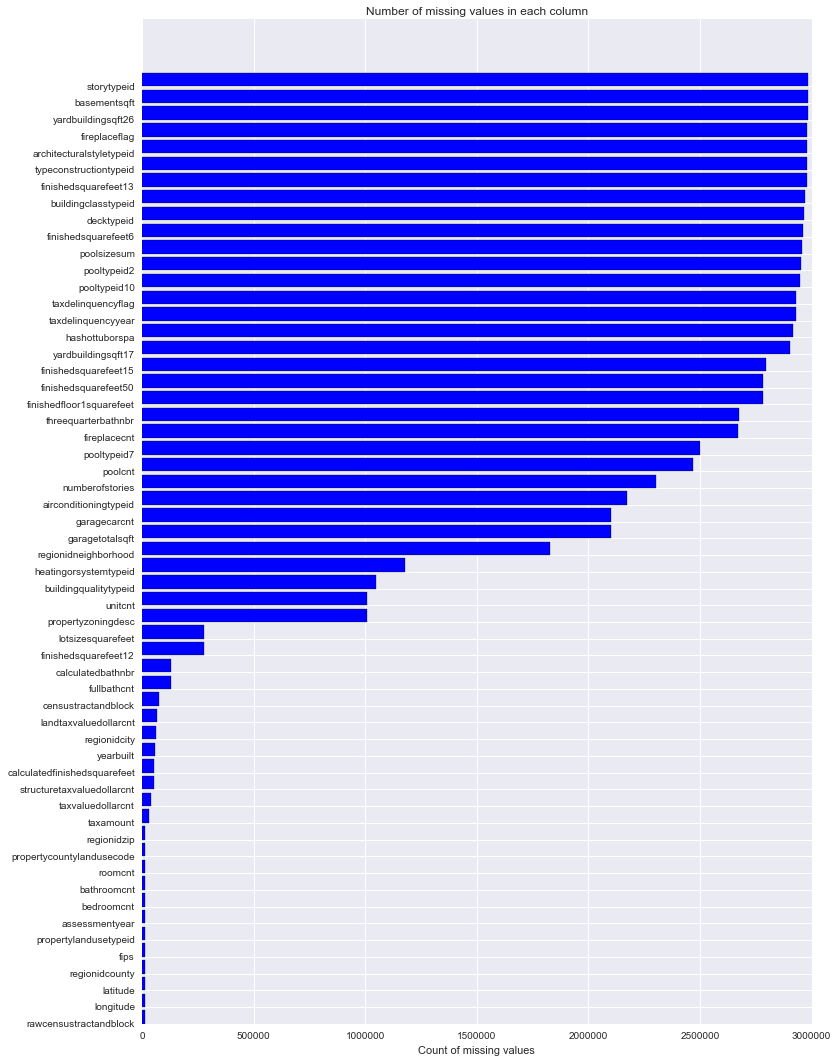

In [108]:
missing_df = missing_df.ix[missing_df['missing_count']>0]
missing_df = missing_df.sort_values(by="missing_count")
missing_df

#Plot the data
ind = np.arange(missing_df.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize=(12,18))
rects = ax.barh(ind, missing_df.missing_count.values, color='blue')
ax.set_yticks(ind)
ax.set_yticklabels(missing_df.column_names.values, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_title("Number of missing values in each column")
plt.show()

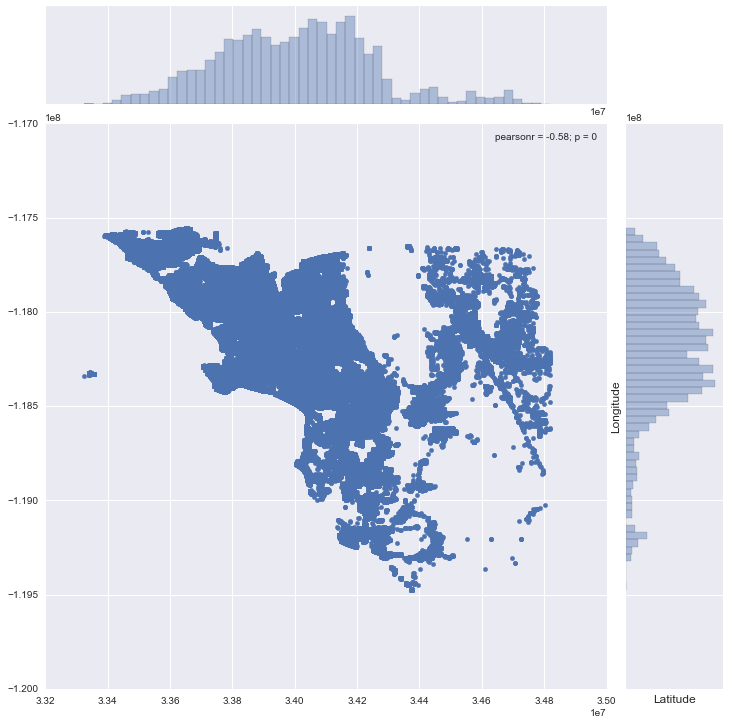

In [109]:
plt.figure(figsize=(12,12))
sns.jointplot(x=prop_df.latitude.values, y=prop_df.longitude.values, size=10)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()

From the data page, we are provided with a full list of real estate properties in three counties (Los Angeles, Orange and Ventura, California) data in 2016.

We have about 90,811 rows in train but we have about 2,985,217 rows in properties file. So let us merge the two files and then carry out our analysis.

In [112]:
train_df = pd.merge(train_df, prop_df, on='parcelid', how='left')
train_df.head()

,parcelid,logerror,transactiondate,transaction_month,airconditioningtypeid_x,architecturalstyletypeid_x,basementsqft_x,bathroomcnt_x,bedroomcnt_x,buildingclasstypeid_x,buildingqualitytypeid_x,calculatedbathnbr_x,decktypeid_x,finishedfloor1squarefeet_x,calculatedfinishedsquarefeet_x,finishedsquarefeet12_x,finishedsquarefeet13_x,finishedsquarefeet15_x,finishedsquarefeet50_x,finishedsquarefeet6_x,fips_x,fireplacecnt_x,fullbathcnt_x,garagecarcnt_x,garagetotalsqft_x,hashottuborspa_x,heatingorsystemtypeid_x,latitude_x,longitude_x,lotsizesquarefeet_x,poolcnt_x,poolsizesum_x,pooltypeid10_x,pooltypeid2_x,pooltypeid7_x,propertycountylandusecode_x,propertylandusetypeid_x,propertyzoningdesc_x,rawcensustractandblock_x,regionidcity_x,regionidcounty_x,regionidneighborhood_x,regionidzip_x,roomcnt_x,storytypeid_x,threequarterbathnbr_x,typeconstructiontypeid_x,unitcnt_x,yardbuildingsqft17_x,yardbuildingsqft26_x,yearbuilt_x,numberofstories_x,fireplaceflag_x,structuretaxvaluedollarcnt_x,taxvaluedollarcnt_x,assessmentyear_x,landtaxvaluedollarcnt_x,taxamount_x,taxdelinquencyflag_x,taxdelinquencyyear_x,censustractandblock_x,airconditioningtypeid_y,architecturalstyletypeid_y,basementsqft_y,bathroomcnt_y,bedroomcnt_y,buildingclasstypeid_y,buildingqualitytypeid_y,calculatedbathnbr_y,decktypeid_y,finishedfloor1squarefeet_y,calculatedfinishedsquarefeet_y,finishedsquarefeet12_y,finishedsquarefeet13_y,finishedsquarefeet15_y,finishedsquarefeet50_y,finishedsquarefeet6_y,fips_y,fireplacecnt_y,fullbathcnt_y,garagecarcnt_y,garagetotalsqft_y,hashottuborspa_y,heatingorsystemtypeid_y,latitude_y,longitude_y,lotsizesquarefeet_y,poolcnt_y,poolsizesum_y,pooltypeid10_y,pooltypeid2_y,pooltypeid7_y,propertycountylandusecode_y,propertylandusetypeid_y,propertyzoningdesc_y,rawcensustractandblock_y,regionidcity_y,regionidcounty_y,regionidneighborhood_y,regionidzip_y,roomcnt_y,storytypeid_y,threequarterbathnbr_y,typeconstructiontypeid_y,unitcnt_y,yardbuildingsqft17_y,yardbuildingsqft26_y,yearbuilt_y,numberofstories_y,fireplaceflag_y,structuretaxvaluedollarcnt_y,taxvaluedollarcnt_y,assessmentyear_y,landtaxvaluedollarcnt_y,taxamount_y,taxdelinquencyflag_y,taxdelinquencyyear_y,censustractandblock_y
0,11016594,0.0276,2016-01-01,1,1.0,NaN,NaN,2.0,3.0,NaN,4.0,2.0,NaN,NaN,1684.0,1684.0,NaN,NaN,NaN,NaN,6037.0,NaN,2.0,NaN,NaN,NaN,2.0,34280990.0,-118488536.0,7528.0,NaN,NaN,NaN,NaN,NaN,0100,261.0,LARS,6.037107e+07,12447.0,3101.0,31817.0,96370.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1959.0,NaN,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,NaN,NaN,6.037107e+13,1.0,NaN,NaN,2.0,3.0,NaN,4.0,2.0,NaN,NaN,1684.0,1684.0,NaN,NaN,NaN,NaN,6037.0,NaN,2.0,NaN,NaN,NaN,2.0,34280990.0,-118488536.0,7528.0,NaN,NaN,NaN,NaN,NaN,0100,261.0,LARS,6.037107e+07,12447.0,3101.0,31817.0,96370.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1959.0,NaN,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,NaN,NaN,6.037107e+13
1,14366692,-0.1684,2016-01-01,1,NaN,NaN,NaN,3.5,4.0,NaN,NaN,3.5,NaN,NaN,2263.0,2263.0,NaN,NaN,NaN,NaN,6059.0,NaN,3.0,2.0,468.0,NaN,NaN,33668120.0,-117677556.0,3643.0,NaN,NaN,NaN,NaN,NaN,1,261.0,NaN,6.059052e+07,32380.0,1286.0,NaN,96962.0,0.0,NaN,1.0,NaN,NaN,NaN,NaN,2014.0,NaN,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,NaN,NaN,NaN,NaN,NaN,3.5,4.0,NaN,NaN,3.5,NaN,NaN,2263.0,2263.0,NaN,NaN,NaN,NaN,6059.0,NaN,3.0,2.0,468.0,NaN,NaN,33668120.0,-117677556.0,3643.0,NaN,NaN,NaN,NaN,NaN,1,261.0,NaN,6.059052e+07,32380.0,1286.0,NaN,96962.0,0.0,NaN,1.0,NaN,NaN,NaN,NaN,2014.0,NaN,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,NaN,NaN
2,12098116,-0.0040,2016-01-01,1,1.0,NaN,NaN,3.0,2.0,NaN,4.0,3.0,NaN,NaN,2217.0,2217.0,NaN,NaN,NaN,NaN,6037.0,NaN,3.0,NaN,NaN,NaN,2.0,34136312.0,-118175032.0,11423.0,NaN,NaN,NaN,NaN,NaN,0100,261.0,PSR6,6.037464e+07,47019.0,3101.0,275411.0,96293.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1940.0,NaN,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,NaN,NaN,6.037464e+13,1.0,NaN,NaN,3.0,2.0,NaN,4.0,3.0,NaN,NaN,2217.0,2217.0,NaN,NaN,NaN,NaN,6037.0,NaN,3.0,NaN,NaN,NaN,2.0,34136312.0,-118175032.0,11423.0,NaN,NaN,NaN,NaN,NaN,0100